In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as lite
% matplotlib inline
% pylab inline
import sys
import seaborn as sns;
import folium;
from folium import plugins;
import urllib3;

Populating the interactive namespace from numpy and matplotlib


## Data Analysis with SQLite

In [4]:
con = lite.connect('hubway.db')

In [3]:
def run_query(query, database):
    return pd.read_sql_query(query,database)

In [4]:
query = 'SELECT * FROM trips LIMIT 5;'
run_query(query, con)

,id,duration,start_date,start_station,end_date,end_station,bike_number,sub_type,zip_code,birth_date,gender
0,1,9,2011-07-28 10:12:00,23,2011-07-28 10:12:00,23,B00468,Registered,'97217,1976.0,Male
1,2,220,2011-07-28 10:21:00,23,2011-07-28 10:25:00,23,B00554,Registered,'02215,1966.0,Male
2,3,56,2011-07-28 10:33:00,23,2011-07-28 10:34:00,23,B00456,Registered,'02108,1943.0,Male
3,4,64,2011-07-28 10:35:00,23,2011-07-28 10:36:00,23,B00554,Registered,'02116,1981.0,Female
4,5,12,2011-07-28 10:37:00,23,2011-07-28 10:37:00,23,B00554,Registered,'97214,1983.0,Female


In [5]:
query = 'SELECT duration FROM trips ORDER BY duration DESC LIMIT 5;'
run_query(query, con)

,duration
0,9999
1,9998
2,9998
3,9997
4,9996


In [6]:
query = 'SELECT duration FROM trips ORDER BY duration ASC LIMIT 5;'
run_query(query, con)

,duration
0,0
1,0
2,0
3,0
4,0


In [7]:
query = 'SELECT start_date FROM trips ORDER BY start_date DESC LIMIT 5;'
run_query(query, con)

,start_date
0,2013-11-30 23:39:00
1,2013-11-30 23:36:00
2,2013-11-30 23:32:00
3,2013-11-30 23:32:00
4,2013-11-30 23:30:00


In [8]:
query = 'SELECT start_date FROM trips ORDER BY start_date ASC LIMIT 5;'
run_query(query, con)

,start_date
0,2011-07-28 10:12:00
1,2011-07-28 10:21:00
2,2011-07-28 10:33:00
3,2011-07-28 10:35:00
4,2011-07-28 10:37:00


In [9]:
query = 'SELECT * FROM trips WHERE (duration >= 9990) ORDER BY duration DESC;' 
run_query(query, con)

,id,duration,start_date,start_station,end_date,end_station,bike_number,sub_type,zip_code,birth_date,gender
0,541247,9999,2012-09-26 18:34:00,54,2012-09-26 21:21:00,54,T01078,Casual,,,
1,11341,9998,2011-08-09 10:42:00,40,2011-08-09 13:29:00,42,B00513,Casual,,,
2,416523,9998,2012-08-15 12:11:00,54,2012-08-15 14:58:00,80,B00188,Casual,,,
3,89335,9997,2011-10-09 02:30:00,60,2011-10-09 05:17:00,45,B00047,Casual,,,
4,133967,9996,2011-11-19 13:48:00,4,2011-11-19 16:35:00,58,B00238,Casual,,,
5,147451,9996,2012-03-23 14:48:00,35,2012-03-23 17:35:00,33,B00550,Casual,,,
6,24455,9995,2011-08-20 12:20:00,52,2011-08-20 15:07:00,17,B00552,Casual,,,
7,315737,9995,2012-07-03 18:28:00,12,2012-07-03 21:15:00,12,B00250,Registered,'02120,1964,Male
8,4768,9994,2011-08-03 17:16:00,22,2011-08-03 20:03:00,24,B00002,Casual,,,
9,55771,9994,2011-09-14 15:44:00,40,2011-09-14 18:30:00,40,B00139,Casual,,,


In [35]:
query = 'SELECT COUNT(*) AS "Registered trips" FROM trips WHERE sub_type = "Registered" ;'
run_query(query, con)

,Registered trips
0,1105192


In [34]:
query = 'SELECT COUNT(*) AS "Casual trips" FROM trips WHERE sub_type = "Casual" ;'
run_query(query, con)

,Casual trips
0,464809


In [37]:
query = 'SELECT sub_type AS "Customer Type", AVG(duration) AS "Average Duration" FROM trips GROUP BY sub_type;'

run_query(query, con)

,Customer Type,Average Duration
0,Casual,1519.643897
1,Registered,657.026067


In [17]:
query = '''
SELECT AVG(duration) FROM trips WHERE (2017 - birth_date) > 30; '''

run_query(query, con)

,AVG(duration)
0,923.014685


In [48]:
query = '''
SELECT AVG(duration) FROM trips WHERE (2017 - birth_date) < 31 ; '''

run_query(query, con)

,AVG(duration)
0,644.518993


In [50]:
query = ''' SELECT * FROM stations LIMIT 5; '''
run_query(query, con)

,id,station,municipality,lat,lng
0,3,Colleges of the Fenway,Boston,42.340021,-71.100812
1,4,Tremont St. at Berkeley St.,Boston,42.345392,-71.069616
2,5,Northeastern U / North Parking Lot,Boston,42.341814,-71.090179
3,6,Cambridge St. at Joy St.,Boston,42.361284999999995,-71.06514
4,7,Fan Pier,Boston,42.353412,-71.044624


In [52]:
query = '''
SELECT stations.station AS "Station", COUNT(*) AS "Count"
FROM trips 
JOIN stations
ON trips.start_station = stations.id
GROUP BY stations.station
ORDER BY COUNT(*) DESC
LIMIT 10;
'''

run_query(query, con)

,Station,Count
0,South Station - 700 Atlantic Ave.,56123
1,Boston Public Library - 700 Boylston St.,41994
2,Charles Circle - Charles St. at Cambridge St.,35984
3,Beacon St / Mass Ave,35275
4,MIT at Mass Ave / Amherst St,33644
5,Back Bay / South End Station,32677
6,Boylston St. at Arlington St.,32410
7,Kenmore Sq / Comm Ave,30835
8,The Esplanade - Beacon St. at Arlington St.,28119
9,Newbury St / Hereford St,26733


In [54]:
query = '''
SELECT stations.station AS "Station", COUNT(*) AS "Count"
FROM trips 
JOIN stations
ON trips.start_station = stations.id
WHERE trips.start_station = trips.end_station
GROUP BY stations.station
ORDER BY COUNT(*) DESC
LIMIT 10;
'''

run_query(query, con)

,Station,Count
0,The Esplanade - Beacon St. at Arlington St.,3064
1,Charles Circle - Charles St. at Cambridge St.,2739
2,Boston Public Library - 700 Boylston St.,2548
3,Boylston St. at Arlington St.,2163
4,Beacon St / Mass Ave,2144
5,Newbury St / Hereford St,1636
6,Prudential Center / Belvidere,1590
7,South Station - 700 Atlantic Ave.,1517
8,Christian Science Plaza,1482
9,Kenmore Sq / Comm Ave,1439


In [55]:
query = '''
SELECT COUNT(trips.id) AS "Count"
FROM trips 
JOIN stations AS start
ON trips.start_station = start.id
JOIN stations AS end
ON trips.end_station = end.id
WHERE start.municipality <> end.municipality;
'''

run_query(query, con)


,Count
0,309748


In [65]:
query = '''
SELECT zip_code AS "zip code", 
duration AS "Ride length"
FROM trips
WHERE (duration > 9900) AND (sub_type = 'Registered')
ORDER BY birth_date 
LIMIT 10;
'''
run_query(query, con)


,zip code,Ride length
0,'02116,9905
1,'01915,9953
2,'02120,9995
3,'02118,9968
4,'02108,9920
5,'02482,9980
6,'02482,9927
7,'02038,9982
8,'02116,9938
9,'02215,9945


In [67]:
query = '''
SELECT COUNT(sub_type)
FROM trips
WHERE sub_type = "Registered";
'''

run_query(query, con)

,COUNT(sub_type)
0,1105192


In [ ]:
query = '''
SELECT stations.station AS "Station", COUNT(*) AS "Count"
FROM trips 
JOIN stations
ON trips.start_station = stations.id
GROUP BY stations.station
ORDER BY COUNT(*) DESC
LIMIT 5;
'''

run_query(query, con)

In [ ]:
query = '''
SELECT stations.station AS "Station", COUNT(*) AS "Count"
FROM trips 
JOIN stations
ON trips.start_station = stations.id
WHERE trips.start_station = trips.end_station
GROUP BY stations.station
ORDER BY COUNT(*) DESC
LIMIT 5;
'''

run_query(query, con)


In [ ]:
query = '''
SELECT COUNT(trips.id) AS "Count"
FROM trips 
JOIN stations AS start
ON trips.start_station = start.id
JOIN stations AS end
ON trips.end_station = end.id
WHERE start.municipality <> end.municipality;
'''

run_query(query, con)

## Data Visualization with Pandas, Seaborn & Matplotlib

In [ ]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    full[col] = full[col].convert_objects(convert_numeric=True)

full[cols] = full[cols].fillna(value=0)

In [103]:
data_registered = pd.read_sql_query("SELECT * FROM trips WHERE sub_type = 'Registered' ",con)
data_casual = pd.read_sql_query("SELECT birth_date, start_station, end_station, duration FROM trips WHERE sub_type = 'Casual' ",con)

In [104]:
data_registered['birth_date_numeric']    = pd.to_numeric(data_registered['birth_date'], errors='ignore')
data_registered['duration_numeric']      = pd.to_numeric(data_registered['duration'], errors='ignore')
data_registered['start_station_numeric'] = pd.to_numeric(data_registered['start_station'], errors='ignore')
data_registered['end_station_numeric']   = pd.to_numeric(data_registered['end_station'], errors='ignore')


In [105]:
data_casual['birth_date_numeric']    = pd.to_numeric(data_casual['birth_date'], errors='ignore')
data_casual['duration_numeric']      = pd.to_numeric(data_casual['duration'], errors='ignore')
data_casual['start_station_numeric'] = pd.to_numeric(data_casual['start_station'], errors='ignore')
data_casual['end_station_numeric']   = pd.to_numeric(data_casual['end_station'], errors='ignore')
len(data_casual['end_station_numeric'])

464809

In [106]:
data_registered = data_registered.dropna(axis = 0, how = 'any')

In [102]:
data_casual = data_casual.dropna(axis = 0, how = 'any')


In [107]:
def array_converter(feature, sub_type):
    
    array = []
    if sub_type == 'Casual':
        for i in (data_casual[feature]):
    
            if np.isfinite(i) == True:
                array.append(i)
        
            else:
                array.append(np.nan)
                
    elif sub_type == 'Registered':
        for i in (data_registered[feature]):
    
            if np.isfinite(i) == True:
                array.append(i)
        
            else:
                array.append(np.nan)
    else:
        print "Error. Sub_type must be 'Registered' or 'Casual'. "
        
    array = np.array(array)
    return(array)

In [108]:
len(array_converter('end_station_numeric', 'Casual'    ))

464809

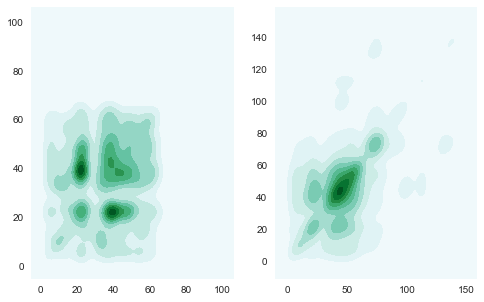

In [109]:
plt.figure(figsize = (8, 5))
plt.subplot(121)
kde_plotter(array_converter('start_station_numeric', 'Registered'), array_converter('end_station_numeric', 'Registered'))

plt.subplot(122)
kde_plotter(array_converter('start_station_numeric', 'Casual'    ), array_converter('end_station_numeric', 'Casual'    ))


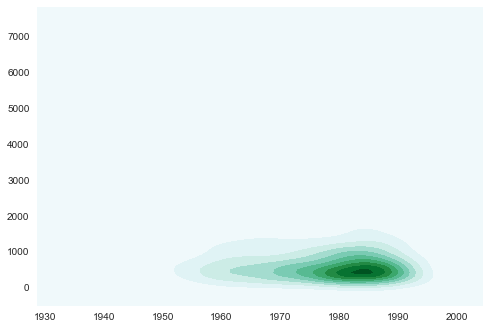

In [56]:
kde_plotter(array_converter('birth_date_numeric', 'Registered'), array_converter('duration_numeric', 'Registered'))


In [29]:
data.isnull().sum()

id                       0
duration                 0
start_date               0
start_station            0
end_date                 0
end_station              0
bike_number              0
sub_type                 0
zip_code                 0
birth_date               0
gender                   0
duration_numeric         0
start_station_numeric    0
end_station_numeric      0
birth_date_numeric       0
zip_code_numeric         0
dtype: int64

In [23]:
data['duration_numeric'] = pd.to_numeric(data['duration'], errors='coerce').fillna(0)
data['start_station_numeric'] = pd.to_numeric(data['start_station'], errors='coerce').fillna(0)
data['end_station_numeric'] = pd.to_numeric(data['end_station'], errors='coerce').fillna(0)
data['birth_date_numeric'] = pd.to_numeric(data['birth_date'], errors='coerce').fillna(0)
data['zip_code_numeric'] = pd.to_numeric(data['zip_code'], errors='coerce').fillna(0)

In [99]:
def kde_plotter(feature_x, feature_y):
    
    N = 100000
    randomize = np.random.randint(len(feature_x), size=N)
    
    
    x = feature_x
    y = feature_y
    
    x = x[randomize]
    y = y[randomize]
    
    
    sns.kdeplot(x, y, shade=True)
    

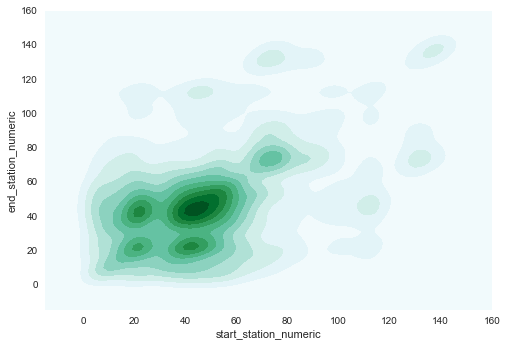

In [33]:
kde_plotter(data['start_station_numeric'], data['end_station_numeric'])

In [45]:
def histogram_it(feature, bins):
    ax = plt.subplot(111)
    sns.distplot(data[feature][data.sub_type == 'Registered'], bins= np.linspace(np.min(data[feature]), np.max(data[feature]), bins), label = 'Registered' )
    sns.distplot(data[feature][data.sub_type == 'Casual'], bins= np.linspace(np.min(data[feature]), np.max(data[feature]), bins), label = 'Casual')
    ax.set_xlabel(feature)
    ax.set_ylabel('%')
    ax.set_title('histogram of feature: ' + feature )
    ax.legend(loc = 'upper right')

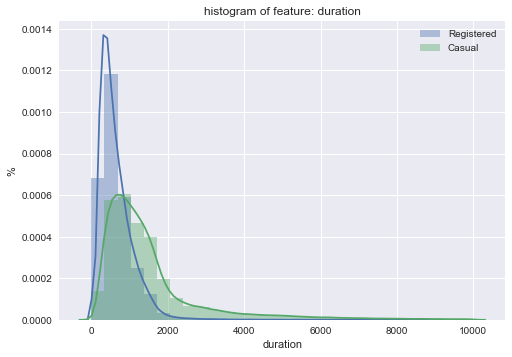

In [48]:
histogram_it('duration' , 30)

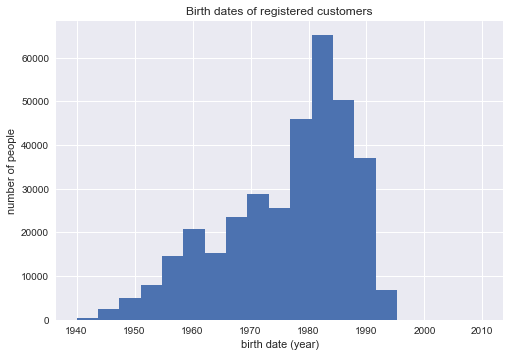

In [88]:
plt.hist(data['birth_date_numeric'][data.sub_type == 'Registered'], bins = np.linspace(1940, 2010, 20));
plt.xlabel('birth date (year)')
plt.ylabel('number of people')
plt.title('Birth dates of registered customers')

In [42]:
sys.path.append('/Users/am2786/Downloads/basemap-1.1.0/lib/mpl_toolkits')
from mpl_toolkits.basemap import Basemap

In [50]:
data_stations = pd.read_sql_query('SELECT * FROM stations',con)

In [53]:
data_stations.isnull().sum()

id              0
station         0
municipality    0
lat             0
lng             0
dtype: int64

In [66]:
locations_heatmap = folium.Map(location=[ float(data_stations['lat'][0]), float(data_stations['lng'][0]) ], zoom_start = 12 )
lat = data_stations['lat']
lon = data_stations['lng']
name = data_stations['station']
for i in range(len(lat)):
    name_i = name[i]
    folium.Marker([ float(lat[i]), float(lon[i]) ], popup = '%s' %name_i).add_to(locations_heatmap)
    
locations_heatmap